# BP wave 
## 100 patients (80 train + 20 test)
### 10s
#### Random Forest Model

#### LSTM Model
##### CC
* ref bp -- est bp
* ppg -- est bp
* unaligned ppg -- est bp
* ecg -- est bp

##### MAE
* ref bp -- est bp



### 30s
#### Random Forest Model

#### LSTM Model

### 60s
#### Random Forest Model

#### LSTM Model


## 600 patients(500 train + 100 test)
### 30s
#### Random Forest Model

#### LSTM Model



# BP point to point 

##### MAE
* ref sbp -- est sbp
* ref dbp -- ref dbp

In [2]:
## read the data
import scipy.io
data = scipy.io.loadmat('/Users/jinyanwei/Desktop/BP_Model/Data/Cuffless_BP_Estimation/part_1.mat')

In [3]:
patient60s_list1 = [] 
for i in range(data['p'].shape[1]):
    patient_data = data['p'][0][i] ## shapes like (3, 61000)
    if patient_data.shape[1] > 8000:
        patient60s_list1.append(i)
print(len(patient60s_list1), patient60s_list1)

723 [0, 1, 2, 3, 4, 5, 6, 14, 15, 16, 17, 18, 24, 35, 36, 37, 38, 39, 40, 41, 42, 46, 50, 62, 64, 66, 67, 71, 73, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 114, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 139, 140, 141, 143, 144, 145, 146, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 28

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def check_signal(patient):
    patient_signal = data['p'][0][patient][:, :8000]
    ppg_signal = patient_signal[0]
    bp_signal = patient_signal[1]
    ecg_signal = patient_signal[2]
    ppg_normalized = (ppg_signal - min(ppg_signal)) / (max(ppg_signal) - min(ppg_signal))
    bp_normalized = (bp_signal - min(bp_signal)) / (max(bp_signal) - min(bp_signal))
    ecg_normalized = (ecg_signal - min(ecg_signal)) / (max(ecg_signal) - min(ecg_signal))
    plt.figure(figsize=(30,6))
    plt.plot(ppg_normalized)
    plt.plot(bp_normalized)
    plt.plot(ecg_normalized)
    plt.show()
    #plt.show(block=False)
    #plt.pause(3)
    #plt.clf()


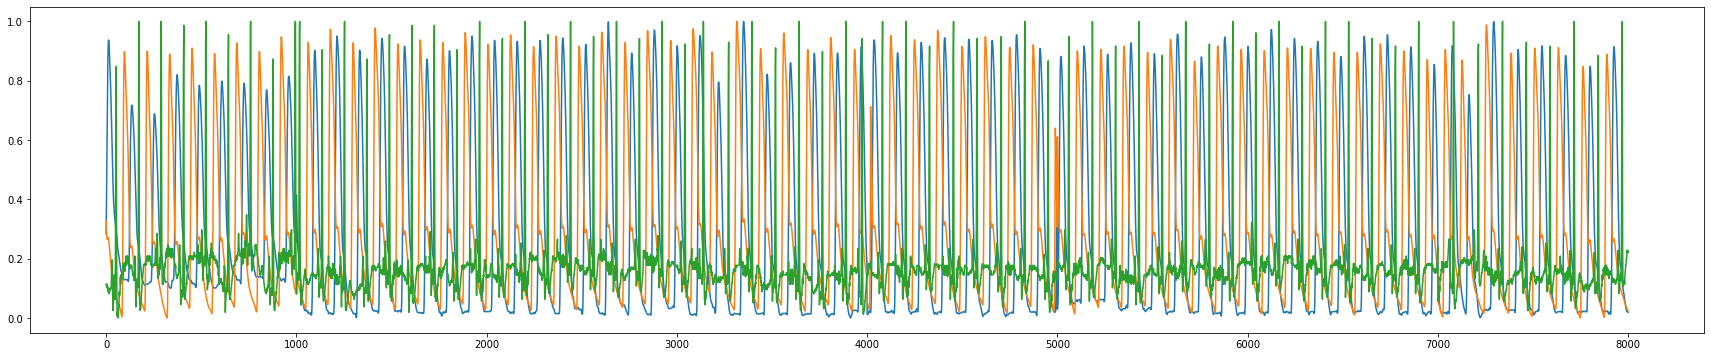

999


In [95]:
#plt.ion()
import time
from IPython.display import display, clear_output

for patient in patient60s_list1[450:]:
    check_signal(patient)
    print(patient)
    #plt.show(block=False)
    #plt.pause(3)
    time.sleep(3.5)
    #plt.clf()
    #plt.close(fig)
    clear_output(wait=True)
#plt.ioff()

In [99]:
patient60s_deleted1 = [2, 4, 62, 71, 83, 85, 86, 87, 88, 89, 99, 100, 101, 102, 104, 105, 106,108, 111, 114, 115, 116, 117, 121, 125, 126, 130, 131,132, 134, 139, 141, 146, 146, 149, 150, 152, 153, 157, 160, 165, 169, 171, 178, 179, 182, 184, 195, 224, 237, 240, 241, 242, 245, 246, 247, 249,250, 261, 262, 267, 272, 279, 283, 296, 308, 310, 311, 312, 313, 319, 320, 325, 326, 327, 329, 330, 331, 332, 333, 337, 339, 342, 345, 349, 356, 361, 363, 371, 376, 380, 382, 385, 388, 389, 407, 410, 416, 425, 440, 444, 449, 452, 453, 454, 457, 460, 462, 463, 464, 465, 466, 469, 471, 472, 474, 491, 492, 493, 496, 498, 500, 501, 502, 503, 516, 517, 520, 522, 524, 535, 537, 538, 539, 549, 550, 551, 555, 561, 564, 576, 577, 578, 586, 599, 601, 602, 603, 604, 605, 606, 607, 609, 612, 613, 614, 623, 629, 633, 634, 636, 639, 640, 642, 646, 653, 654, 657, 670,673, 676, 678, 679, 680, 681, 682, 683, 692, 694, 701, 711, 712, 717, 724, 727, 729, 731, 738, 740, 743, 756, 758, 759, 786, 787, 796, 807, 808, 809, 810, 812, 813, 815, 816, 835, 845, 846, 847, 848, 849, 852, 881, 903, 914, 917, 920, 948, 950, 977, 984, 986, 994, 997]
patient60s_saved1 = []
for i in patient60s_list1:
    if i not in patient60s_deleted1:
        patient60s_saved1.append(i)
len(patient60s_saved1)

501

In [100]:
# functions:
fs =125 # Sample rate in Hz

import scipy.signal as signal
def chebyshev_filter(signal):
    # Define the filter order and cutoff frequency
    order = 4
    cutoff_freq = 20  # Cutoff frequency in Hz
    # Create the Chebyshev low-pass filter
    b, a = signal.cheby1(order, 0.5, cutoff_freq / (fs / 2), 'low', analog=False)
    return signal.lfilter(b, a, signal)

from scipy.signal import butter, filtfilt
def butter_filter(signal):
    fs = 125  # Sample rate
    cutoff = 5  # Cutoff frequency in Hz
    # Design the Butterworth low-pass filter
    nyquist = 0.5 * fs
    cutoff_norm = cutoff / nyquist
    b, a = butter(4, cutoff_norm, btype='low')
    return filtfilt(b, a, signal)

import numpy as np
def straighten_ecg(ecg_signal):
    detrended_ecg = np.subtract(ecg_signal, np.mean(ecg_signal))
    return detrended_ecg
    
import numpy as np
def normalize_sinal(ppg):
# Assuming ppg_signal and ecg_signal are your original PPG and ECG signals
    ppg_min = np.min(ppg)
    ppg_max = np.max(ppg)
    normalized_ppg = (ppg - ppg_min) / (ppg_max - ppg_min)
    return normalized_ppg
def standard_signal(bp): 
    return (bp - np.mean(bp)) / np.std(bp)
def inverse_standard_signal(bp_ori, bp_est):
    mean = np.mean(bp_ori)
    std = np.std(bp_ori)
    return (bp_est * std) + mean

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
def align_ppgbp_segment(ppg_signal, bp_signal1, bp_signal2, ecg_signal, show=0): ## ppg_signal = ppg_normalized, bp_signal = bp_normalized, ecg_signal = ecg_normalized; get ppg_aligned, bp_aligned
    ppg_peaks, _ = find_peaks(ppg_signal, height=0.5)  # Adjust the height threshold as needed
    bp_peaks, _ = find_peaks(bp_signal1, height=0.4)
    ecg_peaks, _ = find_peaks(ecg_signal, height=0.65)
    #print(f'ppg peaks: {len(ppg_peaks)} {ppg_peaks}')
    #print(f'ecg peaks: {len(ecg_peaks)} {ecg_peaks}')

    first_ecg_peak = ecg_peaks[0]
    #print(f'first ecg peak: {first_ecg_peak}')
    indices_ppg = np.argwhere(ppg_peaks[:10] > first_ecg_peak)
    first_ppg_peak = ppg_peaks[int(indices_ppg[0])]
    #print(f'first ppg peak: {first_ppg_peak}')
    indices_bp = np.argwhere(bp_peaks[:10] > first_ecg_peak)
    first_bp_peak = bp_peaks[int(indices_bp[0])]
    #print(f'first bp peak: {first_bp_peak}')
    ppg_bp_peaks_subtraction = abs(bp_peaks[int(indices_bp[0]):int(indices_bp[0])+20] - ppg_peaks[int(indices_ppg[0]):int(indices_ppg[0])+20])
    #print(ppg_bp_peaks_subtraction)
    distance_ppgbp = np.bincount(ppg_bp_peaks_subtraction).argmax()
    #print(move_distance)
    #print(bp_peaks[int(indices_bp[0]):int(indices_bp[0])+20] - ppg_peaks[int(indices_ppg[0]):int(indices_ppg[0])+20])
    #print(f'distance:{distance_ppgbp}')
    if first_bp_peak > first_ppg_peak:
        bp_aligned = bp_signal1[distance_ppgbp:]
        bp_ori_aligned = bp_signal2[distance_ppgbp:]
        ppg_aligned = ppg_signal
    elif first_bp_peak < first_ppg_peak:
        bp_aligned = bp_signal1
        bp_ori_aligned = bp_signal2
        ppg_aligned = ppg_signal[distance_ppgbp:]
    else:
        bp_aligned = bp_signal1
        bp_ori_aligned = bp_signal2
        ppg_aligned = ppg_signal
    #print(f'ppg len: {len(ppg_aligned)}')
    #print(f'bp len: {len(bp_aligned)}')
    min_len = min(len(bp_aligned), len(ppg_aligned))
    ppg_aligned = ppg_aligned[:min_len]
    bp_aligned = bp_aligned[:min_len]
    bp_ori_aligned = bp_ori_aligned[:min_len]
    ecg_aligned = ecg_signal[:min_len]
    #print(ecg_aligned)
    ppg_segmented = ppg_aligned[:first_ecg_peak-5]
    bp_segmented = bp_aligned[:first_ecg_peak-5]
    bp_ori_segmented = bp_ori_aligned[:first_ecg_peak-5]
    ecg_segmented = ecg_aligned[:first_ecg_peak-5]

    for ecgi in range(len(ecg_peaks)-1):
        one_ppg_peak, _ = find_peaks(ppg_aligned[ecg_peaks[ecgi]-5:ecg_peaks[ecgi + 1]-5], height=0.5)
        #print(ecg_peaks[ecgi], one_ppg_peak)
        if len(one_ppg_peak) == 1:
            ppg_segmented = np.concatenate((ppg_segmented, ppg_aligned[ecg_peaks[ecgi]-5:ecg_peaks[ecgi + 1]-5]))
            bp_segmented = np.concatenate((bp_segmented, bp_aligned[ecg_peaks[ecgi]-5:ecg_peaks[ecgi + 1]-5]))
            bp_ori_segmented = np.concatenate((bp_ori_segmented, bp_ori_aligned[ecg_peaks[ecgi]-5:ecg_peaks[ecgi + 1]-5]))
            ecg_segmented = np.concatenate((ecg_segmented, ecg_aligned[ecg_peaks[ecgi]-5:ecg_peaks[ecgi + 1]-5]))

    if show == 1:
        plt.figure(figsize=(30, 6))
        plt.plot(ppg_signal, label='PPG')
        plt.plot(bp_signal1, label='BP')
        plt.plot(ecg_signal, label='ECG')
        plt.scatter(ppg_peaks, ppg_signal[ppg_peaks], color='c', marker='o', label='Aligned PPG Peaks')
        plt.scatter(bp_peaks, bp_signal1[bp_peaks], color='orange', marker='o', label='Aligned BP Peaks')
        plt.scatter(ecg_peaks, ecg_signal[ecg_peaks], color='green', marker='o', label='Aligned BP Peaks')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()

        plt.figure(figsize=(30, 6))
        plt.plot(ppg_segmented, label='PPG')
        plt.plot(bp_segmented, label='BP')
        plt.plot(ecg_segmented, label='ECG')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()

    return ppg_segmented, bp_segmented, bp_ori_segmented, ecg_segmented

import numpy as np
def get_feautres(ppg_signal, bp_signal1, bp_signal2, ecg_signal):
    ori_ecg_peaks, _ = find_peaks(ecg_signal)
    r_peaks = np.array([ecg_peak for ecg_peak in ori_ecg_peaks if ecg_signal[ecg_peak] > 0.65])
    #print(f'r_peaks: {len(r_peaks)} {r_peaks}')
    r_peak_amplitudes = (ecg_signal[r_peaks]).tolist()
    r_peak_amplitudes = r_peak_amplitudes[:-1]
    #print(f'r_peak_amplitudes: {len(r_peak_amplitudes)} {r_peak_amplitudes}')
    r_peak_intervals = (np.diff(r_peaks) / fs).tolist()
    #print(f'r_peak_intervals: {len(r_peak_intervals)} {r_peak_intervals}')
    # calculate low peak, s-peak
    low_peak_amplitudes, r_to_low_peak_amplitudes, s_peak_amplitudes= [], [], []
    low_peaks, s_peaks = [], []
    for i in range(len(r_peaks) - 1):
        r_peak = r_peaks[i]
        next_r_peak = r_peaks[i + 1]
        low_peak_amplitude = np.min(ecg_signal[r_peak:next_r_peak])
        r_to_low_peak_amplitude = ecg_signal[r_peak]-low_peak_amplitude
        low_peak_amplitudes.append(low_peak_amplitude)
        r_to_low_peak_amplitudes.append(r_to_low_peak_amplitude)
        low_peak = r_peak + np.argmin(ecg_signal[r_peak:next_r_peak])
        low_peaks.append(low_peak)
        s_peak_amplitude = np.min(ecg_signal[r_peak:low_peak])
        s_peak_amplitudes.append(s_peak_amplitude)
        s_peak = r_peak + np.argmin(ecg_signal[r_peak:low_peak])
        s_peaks.append(s_peak)   
    #print(f'low peaks: {len(low_peaks)} {low_peaks}')  
    #print(f's peaks: {len(s_peaks)} {s_peaks}')  
    # T-Wave Amplitude Calculation
    r_peaks = np.insert(r_peaks, 0, 0) #the first t-peak is before the R-peak
    t_wave_amplitudes, q_wave_amplitudes = [], []
    t_peaks, q_peaks = [], []
    for i in range(len(r_peaks) - 1):
        r_peak = r_peaks[i]
        next_r_peak = r_peaks[i + 1]
        t_wave_amplitude = np.max(ecg_signal[r_peak:next_r_peak])
        t_wave_amplitudes.append(t_wave_amplitude)
        t_peak = r_peak + np.argmax(ecg_signal[r_peak:next_r_peak])
        t_peaks.append(t_peak)
        q_wave_amplitude = np.min(ecg_signal[t_peak:next_r_peak])
        q_wave_amplitudes.append(q_wave_amplitude)
        q_peak = r_peak + np.argmin(ecg_signal[t_peak:next_r_peak])
        q_peaks.append(q_peak)

    t_wave_amplitudes = t_wave_amplitudes[:-1]
    q_wave_amplitudes = q_wave_amplitudes[:-1]
    #print(f't peaks: {len(t_peaks)} {t_peaks}')  
    #print(f'q peaks: {len(q_peaks)} {q_peaks}')  
    
    # QRS interval
    r_peaks = np.array([ecg_peak for ecg_peak in ori_ecg_peaks if ecg_signal[ecg_peak] > 0.65])
    qrs_intervals = []
    for i in range(len(r_peaks)-1):
        qrs_interval = (ecg_signal[s_peaks[i]] - ecg_signal[q_peaks[i]]) / fs
        qrs_intervals.append(abs(qrs_interval))
    #print(f'qrs_intervals: {len(qrs_intervals)} {qrs_intervals}')  

    # get ppg features:
    ppg_pulses, bp_pulses, bp_ori_pulses = [], [], []
    for i in range(len(r_peaks)-1):
        ppg_pulse = ppg_signal[r_peaks[i]:r_peaks[i+1]]
        bp_pulse = bp_signal1[r_peaks[i]:r_peaks[i+1]]
        bp_ori_pulse = bp_signal2[r_peaks[i]:r_peaks[i+1]]
        ppg_pulses.append(ppg_pulse)
        bp_pulses.append(bp_pulse)
        bp_ori_pulses.append(bp_ori_pulse)
    #print(f'bp pulses: {bp_pulses}')
    ppg_pulse_amplitude = [np.max(pulse) - np.min(pulse) for pulse in ppg_pulses]
    ppg_pulse_width = [pulse.shape[0]/fs for pulse in ppg_pulses]
    ppg_high_to_low_interval = [np.argmin(pulse)/fs for pulse in ppg_pulses]
    ppg_slope_change_std = [np.std(np.diff(pulse)) for pulse in ppg_pulses]

    sbp = [np.max(pulse) for pulse in bp_pulses]
    dbp = [np.min(pulse) for pulse in bp_pulses]
    sbp_ori = [np.max(pulse) for pulse in bp_ori_pulses]
    dbp_ori = [np.min(pulse) for pulse in bp_ori_pulses]
    
    return sbp, dbp, sbp_ori, dbp_ori, ppg_pulse_amplitude, ppg_pulse_width, ppg_high_to_low_interval, ppg_slope_change_std, t_wave_amplitudes, q_wave_amplitudes, r_peak_amplitudes, s_peak_amplitudes, low_peak_amplitudes, qrs_intervals, r_to_low_peak_amplitudes, r_peak_intervals

import matplotlib.pyplot as plt
def show_one(signal1):
    fig = plt.figure(figsize=(30,6))
    plt.plot(signal1)
    return plt.show()
def show_two(signal1, signal2):
    fig = plt.figure(figsize=(30,6))
    plt.plot(signal1, label='1')
    plt.plot(signal2, label='2')
    plt.legend()
    return plt.show()
def show_three(signal1, signal2, signal3):
    fig = plt.figure(figsize=(30,6))
    plt.plot(signal1, label='1')
    plt.plot(signal2, label='2')
    plt.plot(signal3, label='3')
    plt.legend()
    return plt.show()

In [123]:
sbp500 = []
dbp500 = []
sbp_ori500 = []
dbp_ori500 = []
features500 = []
for patient in patient60s_saved1:
    patient_signal = data['p'][0][patient][:, :3000]
    ppg_signal = patient_signal[0]
    bp_signal = patient_signal[1]
    ecg_signal = patient_signal[2]
    ppg_normalized = (ppg_signal - min(ppg_signal)) / (max(ppg_signal) - min(ppg_signal))
    bp_normalized = (bp_signal - min(bp_signal)) / (max(bp_signal) - min(bp_signal))
    ecg_normalized = (ecg_signal - min(ecg_signal)) / (max(ecg_signal) - min(ecg_signal))
    ppg_segmented, bp_segmented, bp_ori_segmented, ecg_segmented = align_ppgbp_segment(ppg_signal = ppg_normalized, bp_signal1 = bp_normalized, bp_signal2 = bp_signal, ecg_signal = ecg_normalized, show=0)
    bps_features = get_feautres(ppg_segmented, bp_segmented, bp_ori_segmented, ecg_segmented)
    sbp = np.array(bps_features[0])
    dbp = np.array(bps_features[1])
    sbp_ori = np.array(bps_features[2])
    dbp_ori = np.array(bps_features[3])
    features = np.array(bps_features[4:])
    sbp500.append(sbp)
    dbp500.append(dbp)
    sbp_ori500.append(sbp_ori)
    dbp_ori500.append(dbp_ori)
    features500.append(features)

In [124]:
bp500 = []
bp_ori500 = []
features_wave500 = []
for patient in patient60s_saved1[:500]:
    patient_signal = data['p'][0][patient][:, :3750]
    ppg_signal = patient_signal[0]
    bp_signal = patient_signal[1]
    ecg_signal = patient_signal[2]
    ppg_normalized = (ppg_signal - min(ppg_signal)) / (max(ppg_signal) - min(ppg_signal))
    bp_normalized = (bp_signal - min(bp_signal)) / (max(bp_signal) - min(bp_signal))
    ecg_normalized = (ecg_signal - min(ecg_signal)) / (max(ecg_signal) - min(ecg_signal))
    ppg_segmented, bp_segmented, bp_ori_segmented, ecg_segmented = align_ppgbp_segment(ppg_signal = ppg_normalized, bp_signal1 = bp_normalized, bp_signal2 = bp_signal, ecg_signal = ecg_normalized, show=0)
    features_wave = np.array([ppg_segmented, ecg_segmented])
    bp500.append(bp_segmented)
    bp_ori500.append(bp_ori_segmented)
    features_wave500.append(features_wave)

In [119]:
## point
train_sbp = sbp500[:400]
train_dbp = dbp500[:400]
train_sbp_ori = sbp_ori500[:400]
train_dbp_ori = dbp_ori500[:400]
train_features = features500[:400]
test_sbp = []
test_dbp = []
test_sbp_ori = []
test_dbp_ori = []
test_features = []

for i in range(len(sbp500)-400):
    train_sbp.append(sbp500[i+400][:int(0.2*len(sbp500[i+400]))])
    train_dbp.append(dbp500[i+400][:int(0.2*len(dbp500[i+400]))])
    train_sbp_ori.append(sbp_ori500[i+400][:int(0.2*len(sbp_ori500[i+400]))])
    train_dbp_ori.append(dbp_ori500[i+400][:int(0.2*len(dbp_ori500[i+400]))])
    train_features.append(features500[i+400][:,:int(0.2*(features500[i+400].shape[1]))])
    test_sbp.append(sbp500[i+400][int(0.2*len(sbp500[i+400])):])
    test_dbp.append(dbp500[i+400][int(0.2*len(dbp500[i+400])):])
    test_sbp_ori.append(sbp_ori500[i+400][int(0.2*len(sbp_ori500[i+400])):])
    test_dbp_ori.append(dbp_ori500[i+400][int(0.2*len(dbp_ori500[i+400])):])
    test_features.append(features500[i+400][:,int(0.2*(features500[i+400].shape[1])):])

merged_train_sbp = np.concatenate(train_sbp, axis=0)
merged_train_dbp = np.concatenate(train_dbp, axis=0)
merged_train_sbp_ori = np.concatenate(train_sbp_ori, axis=0)
merged_train_dbp_ori = np.concatenate(train_dbp_ori, axis=0)
merged_train_features = np.concatenate(train_features, axis=1)

In [125]:
# wave
train_bp = bp500[:400]
train_bp_ori = bp_ori500[:400]
train_features_wave = features_wave500[:400]
test_bp = []
test_bp_ori = []
test_features_wave = []

for i in range(len(bp500)-400):
    train_bp.append(bp500[i+400][:int(0.2*len(bp500[i+400]))])
    train_bp_ori.append(bp_ori500[i+400][:int(0.2*len(bp_ori500[i+400]))])
    train_features_wave.append(features_wave500[i+400][:,:int(0.2*(features_wave500[i+400].shape[1]))])
    test_bp.append(bp500[i+400][int(0.2*len(bp500[i+400])):])
    test_bp_ori.append(bp_ori500[i+400][int(0.2*len(bp_ori500[i+400])):])
    test_features_wave.append(features_wave500[i+400][:,int(0.2*(features_wave500[i+400].shape[1])):])

merged_train_bp = np.concatenate(train_bp, axis=0)
merged_train_bp_ori = np.concatenate(train_bp_ori, axis=0)
merged_train_features_wave = np.concatenate(train_features_wave, axis=1)

In [185]:
# wave 100 patients features
bp500 = []
bp_ori500 = []
features_wave500 = []
for patient in patient60s_saved1[:100]:
    patient_signal = data['p'][0][patient][:, :2000]
    ppg_signal = patient_signal[0]
    bp_signal = patient_signal[1]
    ecg_signal = patient_signal[2]
    ppg_normalized = (ppg_signal - min(ppg_signal)) / (max(ppg_signal) - min(ppg_signal))
    bp_normalized = (bp_signal - min(bp_signal)) / (max(bp_signal) - min(bp_signal))
    ecg_normalized = (ecg_signal - min(ecg_signal)) / (max(ecg_signal) - min(ecg_signal))
    ppg_segmented, bp_segmented, bp_ori_segmented, ecg_segmented = align_ppgbp_segment(ppg_signal = ppg_normalized, bp_signal1 = bp_normalized, bp_signal2 = bp_signal, ecg_signal = ecg_normalized, show=0)
    features_wave = np.array([ppg_segmented, ecg_segmented])
    bp500.append(bp_segmented)
    bp_ori500.append(bp_ori_segmented)
    features_wave500.append(features_wave)
train_bp = bp500[:80]
train_bp_ori = bp_ori500[:80]
train_features_wave = features_wave500[:80]
test_bp = []
test_bp_ori = []
test_features_wave = []

for i in range(len(bp500)-80):
    train_bp.append(bp500[i+80][:int(0.2*len(bp500[i+80]))])
    train_bp_ori.append(bp_ori500[i+80][:int(0.2*len(bp_ori500[i+80]))])
    train_features_wave.append(features_wave500[i+80][:,:int(0.2*(features_wave500[i+80].shape[1]))])
    test_bp.append(bp500[i+80][int(0.2*len(bp500[i+80])):])
    test_bp_ori.append(bp_ori500[i+80][int(0.2*len(bp_ori500[i+80])):])
    test_features_wave.append(features_wave500[i+80][:,int(0.2*(features_wave500[i+80].shape[1])):])

merged_train_bp = np.concatenate(train_bp, axis=0)
merged_train_bp_ori = np.concatenate(train_bp_ori, axis=0)
merged_train_features_wave = np.concatenate(train_features_wave, axis=1)

ValueError: operands could not be broadcast together with shapes (19,) (18,) 

In [120]:
# points
## array X_train, linear and forest model
X_train = merged_train_features.T
sbp_train = merged_train_sbp
dbp_train = merged_train_dbp

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
linear_model_sbp = LinearRegression()
linear_model_sbp.fit(X_train, sbp_train)
linear_model_dbp = LinearRegression()
linear_model_dbp.fit(X_train, dbp_train)
from sklearn.ensemble import RandomForestRegressor
X_train = X_train.reshape(-1, 1) if len(X_train.shape) == 1 else X_train
randomforest_model_sbp = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model_sbp.fit(X_train, sbp_train)
randomforest_model_dbp = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model_dbp.fit(X_train, dbp_train)

RandomForestRegressor(random_state=42)

In [126]:
# wave 400 train
X_train = merged_train_features_wave.T
bp_train = merged_train_bp

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
linear_model_bp = LinearRegression()
linear_model_bp.fit(X_train, bp_train)
from sklearn.ensemble import RandomForestRegressor
X_train = X_train.reshape(-1, 1) if len(X_train.shape) == 1 else X_train
randomforest_model_bp = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model_bp.fit(X_train, bp_train)

RandomForestRegressor(random_state=42)

In [176]:
# wave 80 train
X_train = merged_train_features_wave.T
bp_train = merged_train_bp

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
X_train = X_train.reshape(-1, 1) if len(X_train.shape) == 1 else X_train
randomforest_model_bp80 = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_model_bp80.fit(X_train, bp_train)

RandomForestRegressor(random_state=42)

In [183]:
# wave 20 test
import pandas as pd
wave_ppg_ecg_df = pd.DataFrame(columns=(('refbp_estbp_cc', 'refbp_ppg_cc', 'refbp_ori_ppg_cc', 'refbp_ecg_cc')))
for i in range(1):#len(test_bp)
    X_test = test_features_wave[i].T
    bp_test = test_bp[i]
    bp_test_ori = test_bp_ori[i]
    X_test = X_test.reshape(-1, 1) if len(X_test.shape) == 1 else X_test
    bp_pred_randomforest = randomforest_model_bp80.predict(X_test)
    # print(len(bp_pred_randomforest), bp_pred_randomforest)
    bp_pred_ori_randomforest = (bp_pred_randomforest * (max(bp_test_ori) - min(bp_test_ori))) + min(bp_test_ori)
    '''print(len(bp_pred_ori_randomforest), bp_pred_ori_randomforest)
    plt.figure(figsize=(30,6))
    plt.plot(bp_pred_randomforest)
    plt.plot(test_features_wave[i][0])
    plt.show()
    print(len(bp_test_ori), bp_test_ori)
    print(len(test_features_wave[i][0]), test_features_wave[i][0])
    print(len(ppg_signal[:len(bp_pred_ori_randomforest)]), ppg_signal[:len(bp_pred_ori_randomforest)])
    print(len(test_features_wave[i][1]), test_features_wave[i][1])'''
    correlation_matrix_1 = np.corrcoef(bp_test_ori, bp_pred_ori_randomforest)
    correlation_coefficient_1 = correlation_matrix_1[0, 1]
    correlation_matrix_2 = np.corrcoef(test_features_wave[i][0], bp_pred_ori_randomforest)
    correlation_coefficient_2 = correlation_matrix_2[0, 1]
    ppg_signal = data['p'][0][patient60s_saved1[400+i]][:, :7500][0]
    correlation_matrix_3 = np.corrcoef(ppg_signal[:len(bp_pred_ori_randomforest)], bp_pred_ori_randomforest)
    correlation_coefficient_3 = correlation_matrix_3[0, 1]
    correlation_matrix_4 = np.corrcoef(test_features_wave[i][1], bp_pred_ori_randomforest)
    correlation_coefficient_4 = correlation_matrix_4[0, 1]
    cc_list = [correlation_coefficient_1, correlation_coefficient_2, correlation_coefficient_3, correlation_coefficient_4]
    wave_ppg_ecg_df.loc[len(wave_ppg_ecg_df)] = cc_list
    display(wave_ppg_ecg_df)
wave_ppg_ecg_df.to_csv('wave_ppg_ecg_random_20test_60s.csv')

,refbp_estbp_cc,refbp_ppg_cc,refbp_ori_ppg_cc,refbp_ecg_cc
0,0.921874,0.941826,0.042341,0.224537


In [115]:
# points
# X_test, linear and forest result
mae_sbp_linears = []
rmse_sbp_linears = []
mae_sbp_randomforests = []
rmse_sbp_randomforests = []
mae_dbp_linears = []
rmse_dbp_linears = []
mae_dbp_randomforests = []
rmse_dbp_randomforests = []
for i in range(len(test_sbp)):#len(test_sbp)
    X_test = test_features[i].T
    sbp_test = test_sbp[i]
    sbp_test_ori = test_sbp_ori[i]
    dbp_test = test_dbp[i]
    dbp_test_ori = test_dbp_ori[i]
    sbp_pred_linear = linear_model_sbp.predict(X_test)
    sbp_pred_ori_linear = (sbp_pred_linear * (max(sbp_test_ori) - min(sbp_test_ori))) + min(sbp_test_ori)
    dbp_pred_linear = linear_model_dbp.predict(X_test)
    dbp_pred_ori_linear = (dbp_pred_linear * (max(dbp_test_ori) - min(dbp_test_ori))) + min(dbp_test_ori)
    # Evaluate the model
    mae_sbp_linear = mean_absolute_error(sbp_test_ori, sbp_pred_ori_linear)
    rmse_sbp_linear = mean_squared_error(sbp_test_ori, sbp_pred_ori_linear, squared=False)
    mae_dbp_linear = mean_absolute_error(dbp_test_ori, dbp_pred_ori_linear)
    rmse_dbp_linear = mean_squared_error(dbp_test_ori, dbp_pred_ori_linear, squared=False)
    # Print the evaluation metrics
    '''print("Root Mean Squared Error (RMSE):", rmse_sbp_linear)
    print("Root Mean Squared Error (RMSE):", rmse_dbp_linear)
    print("Mean Absolute Error (MAE):", mae_sbp_linear)
    print("Mean Absolute Error (MAE):", mae_dbp_linear)
    show_two(sbp_test, sbp_pred_linear)
    show_two(dbp_test_ori, dbp_pred_ori_linear)'''

    X_test = X_test.reshape(-1, 1) if len(X_test.shape) == 1 else X_test
    sbp_pred_randomforest = randomforest_model_sbp.predict(X_test)
    sbp_pred_ori_randomforest = (sbp_pred_randomforest * (max(sbp_test_ori) - min(sbp_test_ori))) + min(sbp_test_ori)
    dbp_pred_randomforest = randomforest_model_dbp.predict(X_test)
    dbp_pred_ori_randomforest = (dbp_pred_randomforest * (max(dbp_test_ori) - min(dbp_test_ori))) + min(dbp_test_ori)
    rmse_sbp_randomforest = mean_squared_error(sbp_test_ori, sbp_pred_ori_randomforest, squared=False)
    mae_sbp_randomforest = mean_absolute_error(sbp_test_ori, sbp_pred_ori_randomforest)
    rmse_dbp_randomforest = mean_squared_error(dbp_test_ori, dbp_pred_ori_randomforest, squared=False)
    mae_dbp_randomforest = mean_absolute_error(dbp_test_ori, dbp_pred_ori_randomforest)
    '''print("Root Mean Squared Error (RMSE):", rmse_sbp_randomforest)
    print("Root Mean Squared Error (RMSE):", rmse_dbp_randomforest)
    print("Mean Absolute Error (MAE):", mae_sbp_randomforest)
    print("Mean Absolute Error (MAE):", mae_dbp_randomforest)

    show_two(sbp_test, sbp_pred_randomforest)
    show_two(dbp_test_ori, dbp_pred_ori_randomforest)'''
    mae_sbp_linears.append(mae_sbp_linear)
    rmse_sbp_linears.append(rmse_sbp_linear)
    mae_sbp_randomforests.append(mae_sbp_randomforest)
    rmse_sbp_randomforests.append(rmse_sbp_randomforest)
    mae_dbp_linears.append(mae_dbp_linear)
    rmse_dbp_linears.append(rmse_dbp_linear)
    mae_dbp_randomforests.append(mae_dbp_randomforest)
    rmse_dbp_randomforests.append(rmse_dbp_randomforest)

In [ ]:
# wave
import pandas as pd
wave_ppg_ecg_df = pd.DataFrame(columns=(('refbp_estbp_cc', 'refbp_ppg_cc', 'refbp_ori_ppg_cc', 'refbp_ecg_cc')))
for i in range(28,30):#len(test_sbp)
    X_test = test_features_wave[i].T
    bp_test = test_bp[i]
    bp_test_ori = test_bp_ori[i]
    X_test = X_test.reshape(-1, 1) if len(X_test.shape) == 1 else X_test
    bp_pred_randomforest = randomforest_model_bp.predict(X_test)
    # print(len(bp_pred_randomforest), bp_pred_randomforest)
    bp_pred_ori_randomforest = (bp_pred_randomforest * (max(bp_test_ori) - min(bp_test_ori))) + min(bp_test_ori)
    '''print(len(bp_pred_ori_randomforest), bp_pred_ori_randomforest)
    plt.figure(figsize=(30,6))
    plt.plot(bp_pred_randomforest)
    plt.plot(test_features_wave[i][0])
    plt.show()
    print(len(bp_test_ori), bp_test_ori)
    print(len(test_features_wave[i][0]), test_features_wave[i][0])
    print(len(ppg_signal[:len(bp_pred_ori_randomforest)]), ppg_signal[:len(bp_pred_ori_randomforest)])
    print(len(test_features_wave[i][1]), test_features_wave[i][1])'''
    correlation_matrix_1 = np.corrcoef(bp_test_ori, bp_pred_ori_randomforest)
    correlation_coefficient_1 = correlation_matrix_1[0, 1]
    correlation_matrix_2 = np.corrcoef(test_features_wave[i][0], bp_pred_ori_randomforest)
    correlation_coefficient_2 = correlation_matrix_2[0, 1]
    ppg_signal = data['p'][0][patient60s_saved1[400+i]][:, :3750][0]
    correlation_matrix_3 = np.corrcoef(ppg_signal[:len(bp_pred_ori_randomforest)], bp_pred_ori_randomforest)
    correlation_coefficient_3 = correlation_matrix_3[0, 1]
    correlation_matrix_4 = np.corrcoef(test_features_wave[i][1], bp_pred_ori_randomforest)
    correlation_coefficient_4 = correlation_matrix_4[0, 1]
    cc_list = [correlation_coefficient_1, correlation_coefficient_2, correlation_coefficient_3, correlation_coefficient_4]
    wave_ppg_ecg_df.loc[len(wave_ppg_ecg_df)] = cc_list
    display(wave_ppg_ecg_df)
wave_ppg_ecg_df.to_csv('wave_ppg_ecg_random90-60.csv')

In [ ]:
# wave
import pandas as pd
wave_ppg_ecg_df = pd.DataFrame(columns=(('refbp_estbp_cc', 'refbp_ppg_cc', 'refbp_ori_ppg_cc', 'refbp_ecg_cc')))
for i in range(82,90):#len(test_sbp)
    X_test = test_features_wave[i].T
    bp_test = test_bp[i]
    bp_test_ori = test_bp_ori[i]
    X_test = X_test.reshape(-1, 1) if len(X_test.shape) == 1 else X_test
    bp_pred_randomforest = randomforest_model_bp.predict(X_test)
    # print(len(bp_pred_randomforest), bp_pred_randomforest)
    bp_pred_ori_randomforest = (bp_pred_randomforest * (max(bp_test_ori) - min(bp_test_ori))) + min(bp_test_ori)
    '''print(len(bp_pred_ori_randomforest), bp_pred_ori_randomforest)
    plt.figure(figsize=(30,6))
    plt.plot(bp_pred_randomforest)
    plt.plot(test_features_wave[i][0])
    plt.show()
    print(len(bp_test_ori), bp_test_ori)
    print(len(test_features_wave[i][0]), test_features_wave[i][0])
    print(len(ppg_signal[:len(bp_pred_ori_randomforest)]), ppg_signal[:len(bp_pred_ori_randomforest)])
    print(len(test_features_wave[i][1]), test_features_wave[i][1])'''
    correlation_matrix_1 = np.corrcoef(bp_test_ori, bp_pred_ori_randomforest)
    correlation_coefficient_1 = correlation_matrix_1[0, 1]
    correlation_matrix_2 = np.corrcoef(test_features_wave[i][0], bp_pred_ori_randomforest)
    correlation_coefficient_2 = correlation_matrix_2[0, 1]
    ppg_signal = data['p'][0][patient60s_saved1[400+i]][:, :3750][0]
    correlation_matrix_3 = np.corrcoef(ppg_signal[:len(bp_pred_ori_randomforest)], bp_pred_ori_randomforest)
    correlation_coefficient_3 = correlation_matrix_3[0, 1]
    correlation_matrix_4 = np.corrcoef(test_features_wave[i][1], bp_pred_ori_randomforest)
    correlation_coefficient_4 = correlation_matrix_4[0, 1]
    cc_list = [correlation_coefficient_1, correlation_coefficient_2, correlation_coefficient_3, correlation_coefficient_4]
    wave_ppg_ecg_df.loc[len(wave_ppg_ecg_df)] = cc_list
    display(wave_ppg_ecg_df)
wave_ppg_ecg_df.to_csv('wave_ppg_ecg_random60-70.csv')

In [116]:
np.mean(mae_sbp_linears), np.mean(rmse_sbp_linears), np.mean(mae_dbp_linears), np.mean(rmse_dbp_linears)

(9.857146761212055, 13.393830703430487, 5.533198837179097, 6.615026180538786)

In [117]:
np.mean(mae_sbp_randomforests), np.mean(rmse_sbp_randomforests), np.mean(mae_dbp_randomforests), np.mean(rmse_dbp_randomforests)

(7.831178105077441, 10.463982639031594, 5.363411286473312, 6.715324276139879)

In [144]:
np.mean(correlation_coefficient_1), np.mean(correlation_coefficient_2), np.mean(correlation_coefficient_3), np.mean(correlation_coefficient_4)

(0.9171579102265712,
 0.9319926481817197,
 0.4073702528513502,
 0.020305196658128986)

In [ ]:
import pandas as pd
wave_ppg_ecg_df = pd.read_csv(/Users/jinyanwei/Desktop/BP_Model/Jinyw_code/cc_mae/4July23_ccmae/wave_ppg_ecg_random_20test_30s.csv)

In [ ]:
def cc_histogram(wave_ppg_ecg_df):
    plt.figure(figsize=(15, 6), dpi=300)
    # Set your color palette
    colors = ['pink', 'c', 'green', 'orange']

    # Specify data
    data1 = np.array(wave_ppg_ecg_df['refbp_estbp_cc'])
    data2 = np.array(wave_ppg_ecg_df['refbp_ppg_cc'])
    data3 = np.array(wave_ppg_ecg_df['refbp_ecg_cc'])

    # Create bins and histogram
    bins = np.linspace(0, 1, 11)
    counts1, _ = np.histogram(abs(data1), bins=bins)
    counts2, _ = np.histogram(abs(data2), bins=bins)
    counts3, _ = np.histogram(abs(data3), bins=bins)

    # Calculate frequencies
    freq1 = counts1 / len(data1)
    freq2 = counts2 / len(data2)
    freq3 = counts3 / len(data3)

    barWidth = 0.25
    r1 = np.arange(len(freq1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    plt.bar(r1, freq1, color=colors[0], width=barWidth, edgecolor='grey', label='refBP_estBP')
    plt.bar(r2, freq2, color=colors[1], width=barWidth, edgecolor='grey', label='refBP_PPG')
    plt.bar(r3, freq3, color=colors[2], width=barWidth, edgecolor='grey', label='refBP_ECG')

    # Adding labels
    for i in range(len(r1)):
        plt.text(x = r1[i] + barWidth/2 - 0.1 , y = freq1[i] + 0.02, s = f"{counts1[i]}", size = 10, ha='center')
        plt.text(x = r2[i] + barWidth/2 - 0.1 , y = freq2[i] + 0.02, s = f"{counts2[i]}", size = 10, ha='center')
        plt.text(x = r3[i] + barWidth/2 - 0.1 , y = freq3[i] + 0.02, s = f"{counts3[i]}", size = 10, ha='center')

    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Frequency')
    plt.xticks([r + barWidth for r in range(len(freq1))], ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0'])
    plt.legend()
    plt.show()
    return